# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Lê Hùng
- MSSV: 22127135
- Lớp: 22CLC04

# Import

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

# Thiết lập kích thước mặc định cho các biểu đồ
plt.rcParams['figure.figsize'] = (10, 6)
sns.set(style="whitegrid")


# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [8]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [11]:
# Cài đặt các hàm cần thiết ở đây
# Hiển thị thông tin tổng quát về tập dữ liệu
print(train.info())

# Hiển thị 5 dòng đầu tiên của tập train
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9000 non-null   int64  
 1   Previous Scores                   9000 non-null   int64  
 2   Extracurricular Activities        9000 non-null   int64  
 3   Sleep Hours                       9000 non-null   int64  
 4   Sample Question Papers Practiced  9000 non-null   int64  
 5   Performance Index                 9000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 422.0 KB
None
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               77                           0            5   
1              8               90                           1            4   
2              9               83                           1            6   
3              4     

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

       Hours Studied  Previous Scores  Extracurricular Activities  \
count    9000.000000      9000.000000                 9000.000000   
mean        4.976444        69.396111                    0.493667   
std         2.594647        17.369957                    0.499988   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

       Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  9000.000000                       9000.000000        9000.000000  
mean      6.535556                          4.590889          55.136333  
std       1.695533                          2.864570          19.187669  
min       4.000000                          0.000000          10.000000  
25%     

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


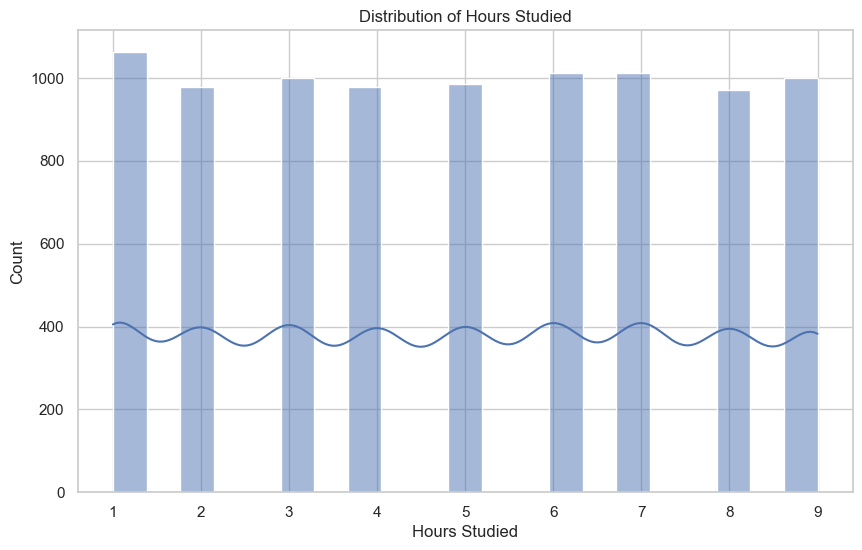

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


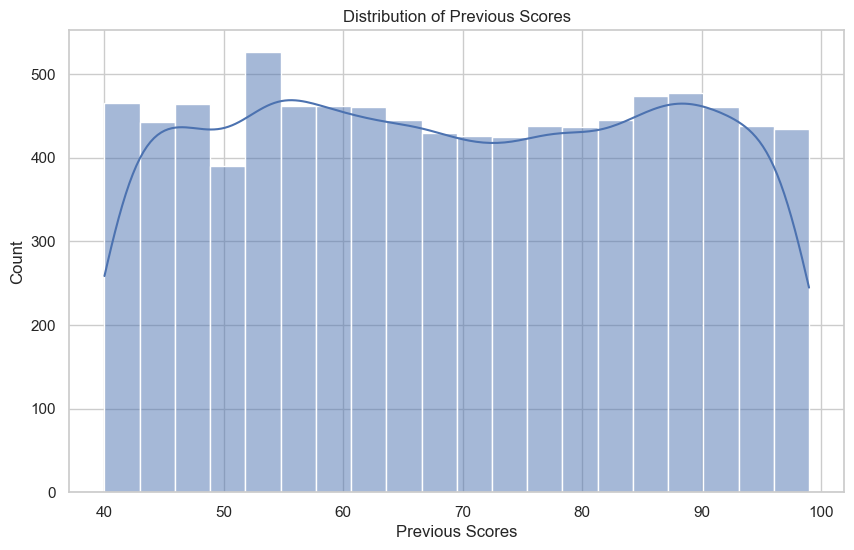

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


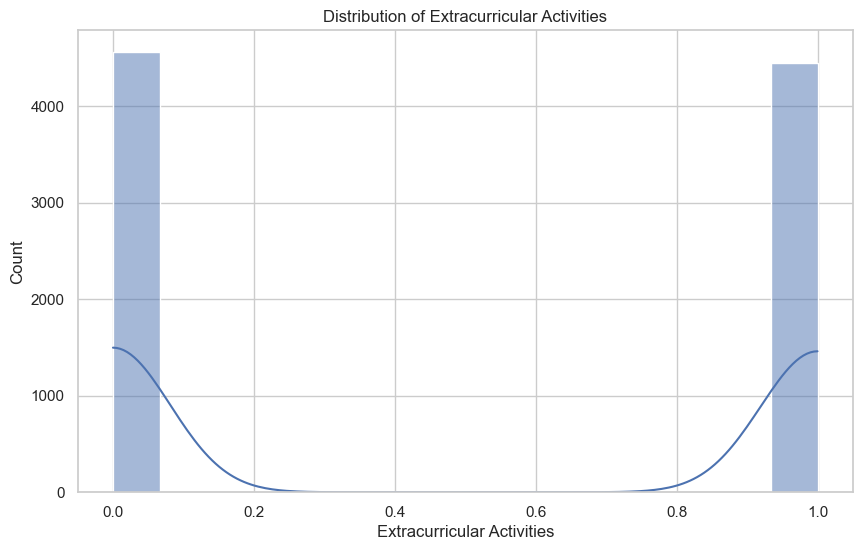

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


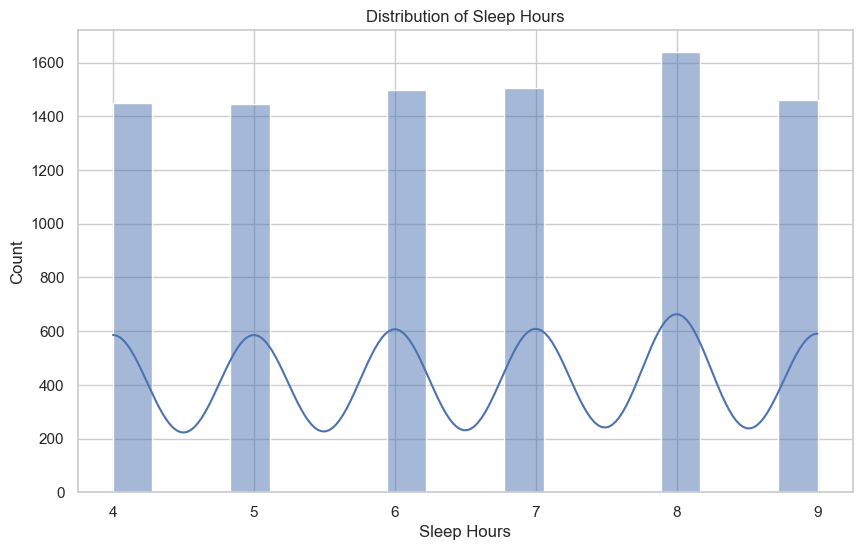

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


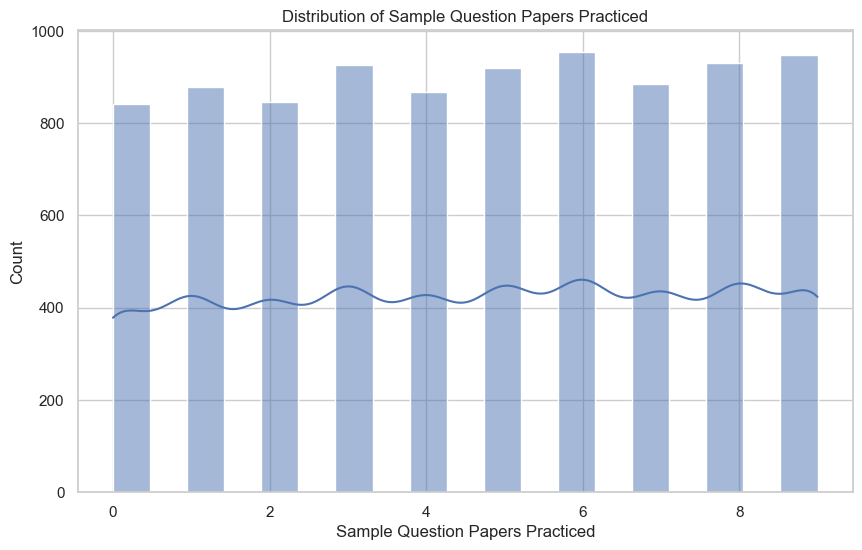

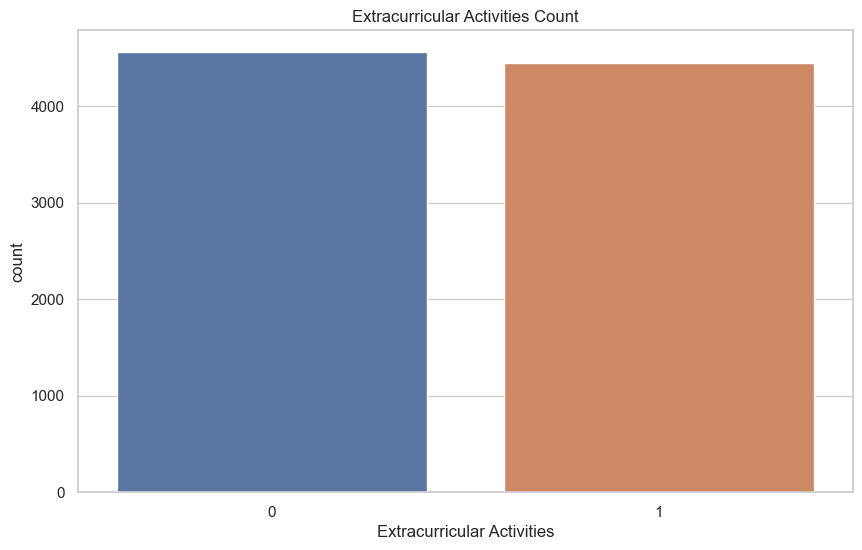

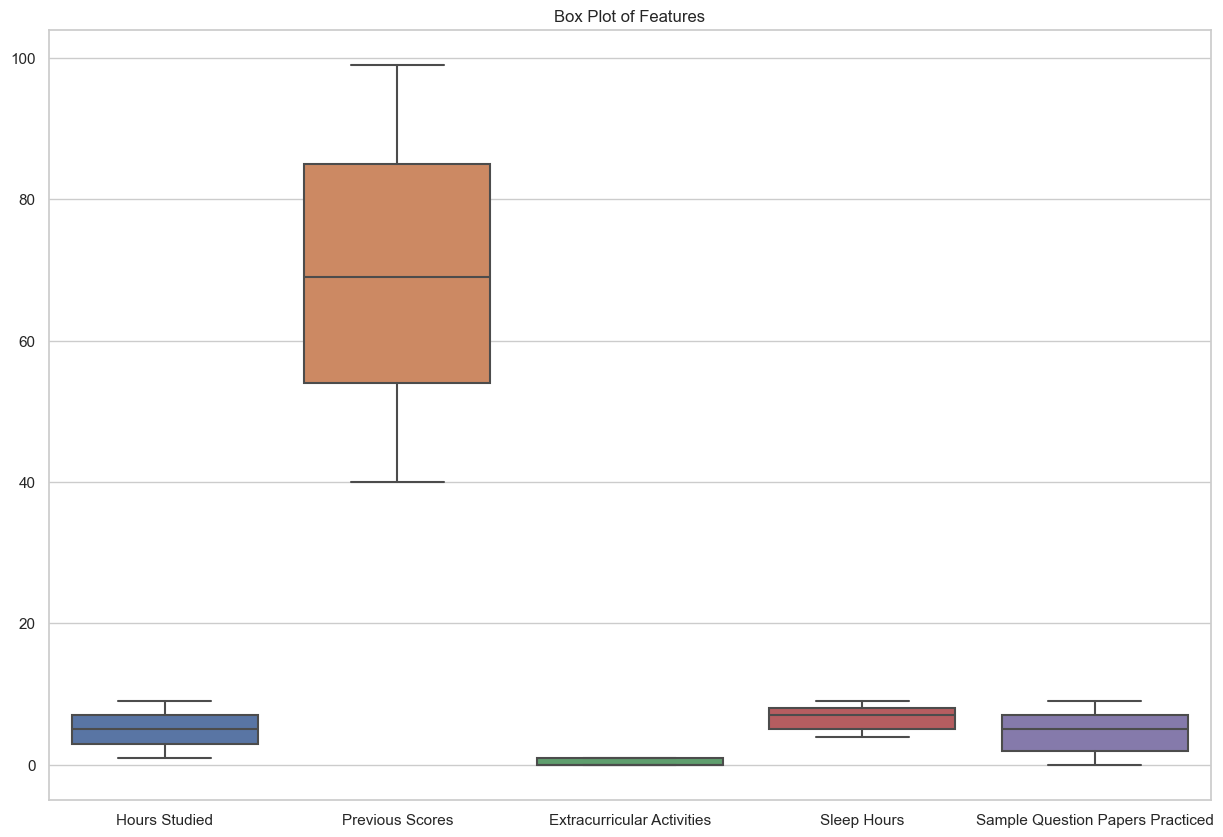

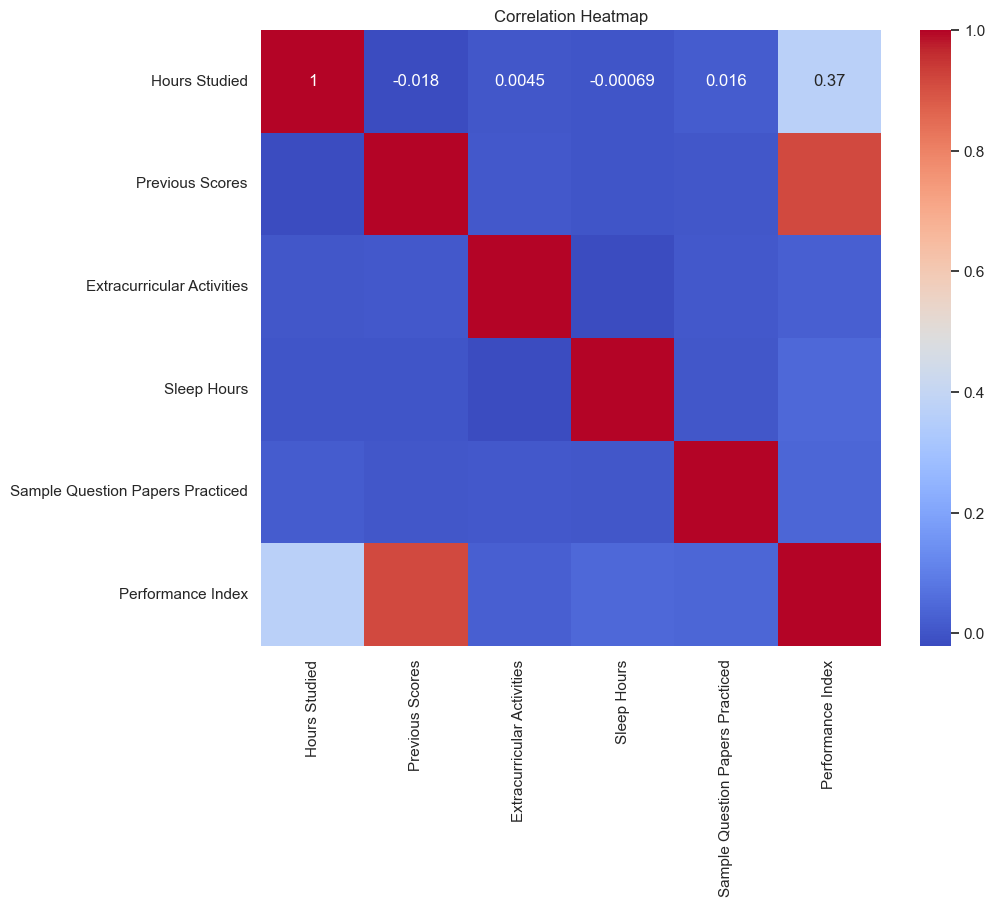

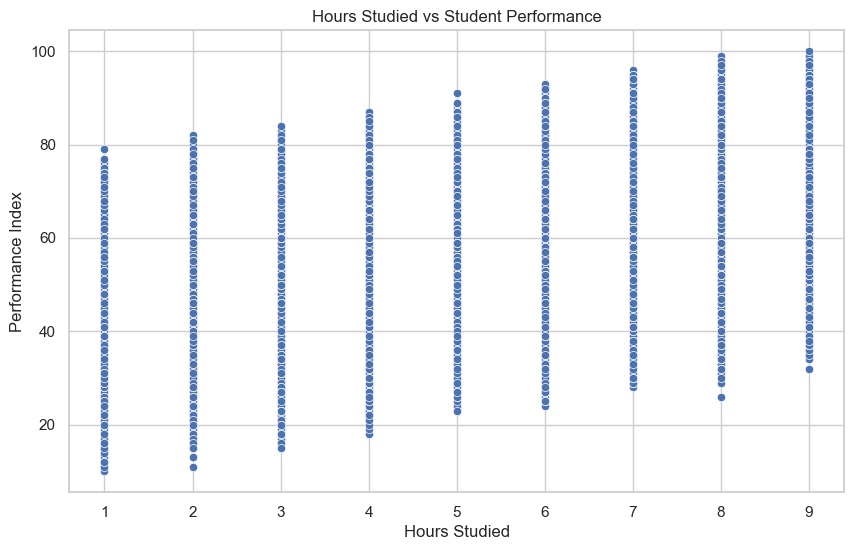

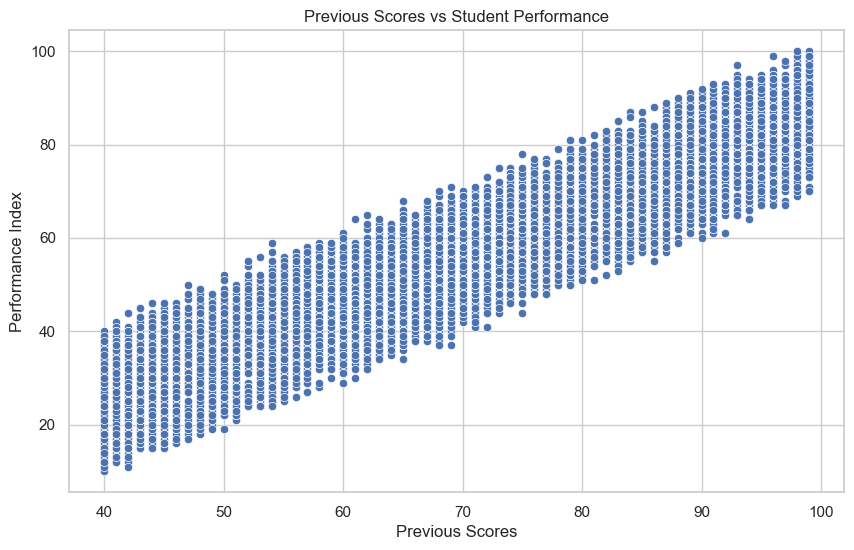

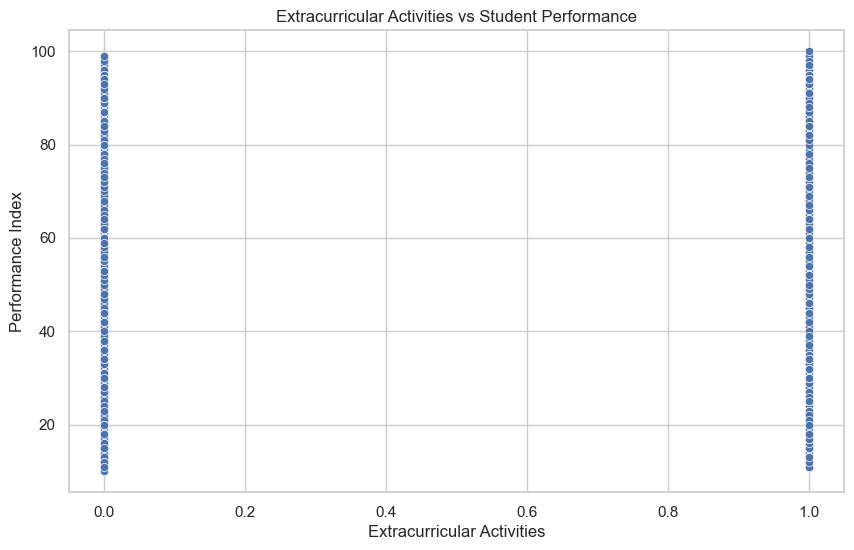

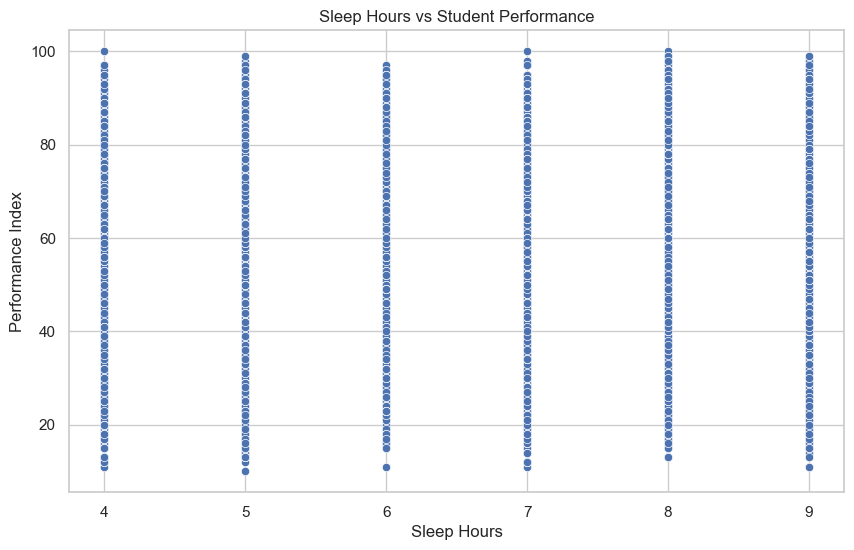

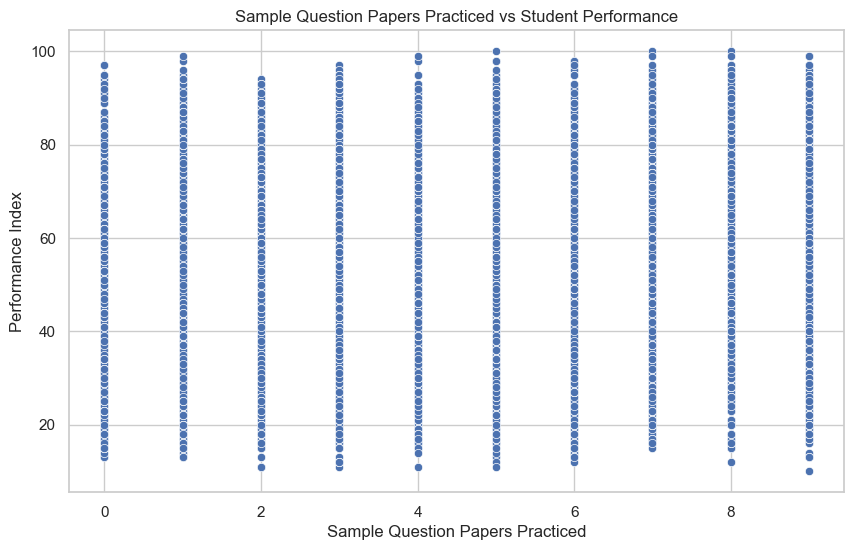

In [14]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Mô tả thống kê các đặc trưng
train_describe = train.describe()
print(train_describe)

# Vẽ biểu đồ phân phối cho từng đặc trưng
for column in X_train.columns:
    plt.figure()
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()
    
# Biểu đồ Bar cho đặc trưng 'Extracurricular Activities'
sns.countplot(x='Extracurricular Activities', data=train)
plt.title('Extracurricular Activities Count')
plt.show()

# Biểu đồ Box Plot cho các đặc trưng
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_train)  # Bỏ cột mục tiêu ra
plt.title('Box Plot of Features')
plt.show()

# Heatmap thể hiện mối tương quan giữa các đặc trưng
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Vẽ Scatter Plot giữa các đặc trưng với chỉ số thành tích (y_train)
for column in X_train.columns:
    plt.figure()
    sns.scatterplot(x=column, y=y_train, data=train)
    plt.title(f'{column} vs Student Performance')
    plt.show()


# Chỉ được phân tích trên tập huấn luyện


# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               74                           0            8   
1              6               89                           1            8   
2              3               79                           0            8   
3              7               62                           0            8   
4              5               51                           0            7   

   Sample Question Papers Practiced  Actual Performance Index  \
0                                 1                      65.0   
1                                 8                      79.0   
2                                 1                      60.0   
3                                 8                      52.0   
4                                 7                      39.0   

   Predicted Performance Index  
0                    65.298108  
1                    79.665047  
2                    58.979376  
3       

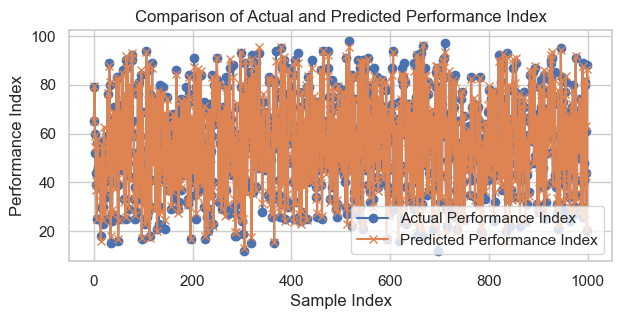


Mean Absolute Error (MAE) on the test set: 1.595648688476298


In [75]:
# Phần code cho yêu cầu 2a
# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)



# Tạo DataFrame để so sánh giá trị thực tế và giá trị dự đoán
results = pd.DataFrame({
    'Hours Studied': X_test['Hours Studied'],
    'Previous Scores': X_test['Previous Scores'],
    'Extracurricular Activities': X_test['Extracurricular Activities'],
    'Sleep Hours': X_test['Sleep Hours'],
    'Sample Question Papers Practiced': X_test['Sample Question Papers Practiced'],
    'Actual Performance Index': y_test,
    'Predicted Performance Index': y_pred
})

# Hiển thị 5 dòng đầu tiên
print(results.head(5))

import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(7, 3))
plt.plot(y_test.values, label='Actual Performance Index', marker='o')
plt.plot(y_pred, label='Predicted Performance Index', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Performance Index')
plt.title('Comparison of Actual and Predicted Performance Index')
plt.legend()
plt.show()

mae_test = mean_absolute_error(y_test, y_pred)
print(f'\nMean Absolute Error (MAE) on the test set: {mae_test}')




In [53]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
# Tính toán MAE trên tập kiểm tra
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) on the test set: {mae}')

# Lấy các hệ số của mô hình
coefficients = model.coef_
intercept = model.intercept_

# Lấy các hệ số của mô hình và làm tròn đến 3 chữ số thập phân
coefficients = np.round(model.coef_, 3)
intercept = np.round(model.intercept_, 3)

# Tạo công thức hồi quy
formula = " + ".join([f"{coeff} * {feat}" for coeff, feat in zip(coefficients, X_train.columns)])
formula = f"Student Performance = {formula} + {intercept}"

# Hiển thị công thức hồi quy
print(formula)



Mean Absolute Error (MAE) on the test set: 1.595648688476298
Student Performance = 2.852 * Hours Studied + 1.018 * Previous Scores + 0.604 * Extracurricular Activities + 0.474 * Sleep Hours + 0.192 * Sample Question Papers Practiced + -33.969


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [49]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu
kf = KFold(n_splits=5, shuffle=True, random_state=1)

best_mae = float('inf')
best_feature = None

# Kiểm tra từng đặc trưng
for feature in X_train.columns:
    model = LinearRegression()
    
    # Thực hiện cross-validation và tính MAE
    neg_mae_scores = cross_val_score(model, X_train[[feature]], y_train, cv=kf, scoring='neg_mean_absolute_error')
    
    # Lấy giá trị trung bình của MAE
    mae_scores = -neg_mae_scores  # Chuyển đổi thành giá trị dương
    avg_mae = mae_scores.mean()
    
    print(f'Feature: {feature}, MAE: {avg_mae}')
    
    # Lưu lại đặc trưng tốt nhất
    if avg_mae < best_mae:
        best_mae = avg_mae
        best_feature = feature

print(f'\nBest feature: {best_feature}, Best MAE: {best_mae}')




Feature: Hours Studied, MAE: 15.450840250192456
Feature: Previous Scores, MAE: 6.618829055214323
Feature: Extracurricular Activities, MAE: 16.19698077678371
Feature: Sleep Hours, MAE: 16.190870831540032
Feature: Sample Question Papers Practiced, MAE: 16.188351141715593

Best feature: Previous Scores, Best MAE: 6.618829055214323


In [55]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
# Huấn luyện lại mô hình với đặc trưng tốt nhất
best_feature_model = LinearRegression()
best_feature_model.fit(X_train[[best_feature]], y_train)

# Dự đoán trên tập kiểm tra
y_pred_best_feature = best_feature_model.predict(X_test[[best_feature]])

# Tạo DataFrame để so sánh giá trị thực tế và giá trị dự đoán
results = pd.DataFrame({
    'Previous Scores': X_test[best_feature],  # Hiển thị giá trị đặc trưng
    'Actual Performance Index': y_test,     # Giá trị thực tế
    'Predicted Performance Index': y_pred_best_feature  # Giá trị dự đoán
})

# Hiển thị 10 dòng đầu tiên
print(results.head(10))


   Previous Scores  Actual Performance Index  Predicted Performance Index
0               74                      65.0                    59.788577
1               89                      79.0                    74.946122
2               79                      60.0                    64.841092
3               62                      52.0                    47.662541
4               51                      39.0                    36.547008
5               55                      44.0                    40.589020
6               46                      25.0                    31.494493
7               64                      56.0                    49.683547
8               71                      46.0                    56.757068
9               45                      46.0                    30.483990


In [64]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
# Tính toán MAE trên tập kiểm tra
mae_test_best_feature = mean_absolute_error(y_test, y_pred_best_feature)
print(f'\nMean Absolute Error (MAE) on the test set using the best feature ({best_feature}): {mae_test_best_feature}')

# Hiển thị công thức hồi quy với đặc trưng tốt nhất
coefficients_best_feature = np.round(best_feature_model.coef_, 3)
intercept_best_feature = np.round(best_feature_model.intercept_, 3)

# Tạo công thức hồi quy
formula_best_feature = f"Student Performance = {coefficients_best_feature[0]} * {best_feature} + {intercept_best_feature}"

# Hiển thị công thức hồi quy
print(formula_best_feature)



Mean Absolute Error (MAE) on the test set using the best feature (Previous Scores): 6.544277293452478
Student Performance = 1.011 * Previous Scores + -14.989


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [79]:
# Thiết kế các mô hình
def model_1(X):
    """
    Model 1: Sử dụng tất cả các đặc trưng gốc.
    """
    return X

def model_2(X):
    """
    Model 2: Sử dụng bình phương của 'Hours Studied'.
    - Đây là một biến đổi phi tuyến tính của đặc trưng 'Hours Studied'.
    - Mục tiêu là kiểm tra xem liệu mối quan hệ phi tuyến tính giữa số giờ học và thành tích có thể cải thiện dự đoán không.
    """
    X_new = X.copy()
    X_new['Hours Studied^2'] = X['Hours Studied'] ** 2
    return X_new[['Hours Studied^2']]

def model_3(X):
    """
    Model 3: Sử dụng tổng của 'Hours Studied' và 'Previous Scores'.
    - Kết hợp hai đặc trưng có thể biểu diễn tổng nỗ lực học tập của học sinh.
    - Mục tiêu là kiểm tra xem tổng hợp này có thể cải thiện dự đoán không.
    """
    X_new = X.copy()
    X_new['Hours + Scores'] = X['Hours Studied'] + X['Previous Scores']
    return X_new[['Hours + Scores']]

def model_4(X):
    """
    Model 4: Sử dụng 'Hours Studied', 'Previous Scores', và tương tác giữa hai đặc trưng này.
    - Tạo thêm một đặc trưng mới là tích của 'Hours Studied' và 'Previous Scores'.
    - Mục tiêu là kiểm tra xem sự tương tác giữa hai đặc trưng này có ảnh hưởng đến kết quả dự đoán không.
    """
    X_new = X.copy()
    X_new['Interaction'] = X['Hours Studied'] * X['Previous Scores']
    return X_new[['Hours Studied', 'Previous Scores', 'Interaction']]

def model_5(X):
    """
    Model 5: Sử dụng 'Sleep Hours' và 'Sample Question Papers Practiced'.
    - Tập trung vào hai đặc trưng liên quan đến thời gian ngủ và thực hành câu hỏi.
    - Mục tiêu là xem liệu thời gian ngủ và thực hành nhiều hơn có ảnh hưởng lớn đến thành tích học tập không.
    """
    return X[['Sleep Hours', 'Sample Question Papers Practiced']]

# Danh sách các mô hình
models = {
    "Model 1 (All features)": model_1,
    "Model 2 (Hours Studied^2)": model_2,
    "Model 3 (Hours + Scores)": model_3,
    "Model 4 (Hours Studied, Previous Scores, Interaction)": model_4,
    "Model 5 (Sleep Hours + Sample Question Papers)": model_5,
}




## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [81]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

best_mae = float('inf')
best_model_name = ""
best_model_func = None

# Sử dụng KFold Cross-Validation với 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Thử nghiệm từng mô hình và tìm mô hình có MAE thấp nhất
for model_name, model_func in models.items():
    X_train_model = model_func(X_train)
    
    # Sử dụng cross_val_score để tính toán MAE trung bình cho mỗi mô hình
    model = LinearRegression()
    mae_scores = -cross_val_score(model, X_train_model, y_train, cv=kf, scoring='neg_mean_absolute_error')
    avg_mae = np.mean(mae_scores)
    
    print(f"{model_name} average MAE from cross-validation: {avg_mae}")
    
    # Lưu lại mô hình tốt nhất
    if avg_mae < best_mae:
        best_mae = avg_mae
        best_model_name = model_name
        my_best_model = model_func

print(f"\nBest model based on cross-validation: {best_model_name}, Best MAE: {best_mae}")




Model 1 (All features) average MAE from cross-validation: 1.6210767924783938
Model 2 (Hours Studied^2) average MAE from cross-validation: 15.508817336101135
Model 3 (Hours + Scores) average MAE from cross-validation: 4.403828645415788
Model 4 (Hours Studied, Previous Scores, Interaction) average MAE from cross-validation: 1.8163124697842874
Model 5 (Sleep Hours + Sample Question Papers) average MAE from cross-validation: 16.181756069565036

Best model based on cross-validation: Model 1 (All features), Best MAE: 1.6210767924783938


In [83]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
# Huấn luyện lại mô hình tốt nhất trên toàn bộ tập huấn luyện
X_train_best_model = my_best_model(X_train)
X_test_best_model = my_best_model(X_test)

best_model = LinearRegression()
best_model.fit(X_train_best_model, y_train)

# Dự đoán trên tập kiểm tra
y_pred_best_model = best_model.predict(X_test_best_model)

def create_results_df(X_test, y_test, y_pred, features):
    """
    Tạo một DataFrame để so sánh giá trị thực tế và giá trị dự đoán.

    Parameters:
    X_test (DataFrame): Dữ liệu kiểm tra chứa các đặc trưng.
    y_test (Series): Giá trị thực tế của chỉ số thành tích (Performance Index).
    y_pred (ndarray): Giá trị dự đoán từ mô hình.
    features (list): Danh sách các đặc trưng được sử dụng trong mô hình.

    Returns:
    DataFrame: DataFrame chứa các giá trị đặc trưng, giá trị thực tế và giá trị dự đoán.
    """
    results = pd.DataFrame(X_test[features], columns=features)  # Hiển thị các giá trị đặc trưng
    results['Actual Performance Index'] = y_test                # Giá trị thực tế
    results['Predicted Performance Index'] = y_pred             # Giá trị dự đoán
    
    return results

# Sử dụng hàm create_results_df
features_used = X_train_best_model.columns  # Các đặc trưng được sử dụng trong mô hình tốt nhất
results = create_results_df(X_test_best_model, y_test, y_pred_best_model, features_used)

# Hiển thị kết quả
print(results.head())  # Hiển thị 5 hàng đầu tiên của DataFrame

# Hiển thị 10 dòng đầu tiên
print(results.head(10))


   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               74                           0            8   
1              6               89                           1            8   
2              3               79                           0            8   
3              7               62                           0            8   
4              5               51                           0            7   

   Sample Question Papers Practiced  Actual Performance Index  \
0                                 1                      65.0   
1                                 8                      79.0   
2                                 1                      60.0   
3                                 8                      52.0   
4                                 7                      39.0   

   Predicted Performance Index  
0                    65.298108  
1                    79.665047  
2                    58.979376  
3       

In [85]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

mae_test_best_model = mean_absolute_error(y_test, y_pred_best_model)
print(f"Mean Absolute Error (MAE) on the test set using the best model: {mae_test_best_model}")

# Lấy các hệ số của mô hình tốt nhất và làm tròn đến 3 chữ số thập phân
coefficients = np.round(best_model.coef_, 3)
intercept = np.round(best_model.intercept_, 3)

# Xác định tên các đặc trưng trong mô hình tốt nhất
features = X_train_best_model.columns

# Tạo công thức hồi quy
formula = " + ".join([f"{coeff} * {feat}" for coeff, feat in zip(coefficients, features)])
formula = f"Student Performance = {formula} + {intercept}"

# Hiển thị công thức hồi quy
print(formula)


Mean Absolute Error (MAE) on the test set using the best model: 1.595648688476298
Student Performance = 2.852 * Hours Studied + 1.018 * Previous Scores + 0.604 * Extracurricular Activities + 0.474 * Sleep Hours + 0.192 * Sample Question Papers Practiced + -33.969


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$